2024-11-25 15:00:09.217371: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732518009.225804   51882 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732518009.228483   51882 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-25 15:00:09.237335: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 6356 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 698 images belonging to 2 classes.


I0000 00:00:1732518010.960496   51882 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13360 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Ti SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9
/home/user/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200


I0000 00:00:1732518133.200844   56085 service.cc:148] XLA service 0x7f89000027b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732518133.200885   56085 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti SUPER, Compute Capability 8.9
2024-11-25 15:02:13.976517: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732518137.083807   56085 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1732518159.821682   56085 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 802ms/step - accuracy: 0.7655 - loss: 2721.5527

2024-11-25 15:04:16.796233: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_add_reduce_subtract_fusion_1', 4 bytes spill stores, 4 bytes spill loads



100/100 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.7666 - loss: 2715.7698 - val_accuracy: 0.8202 - val_loss: 1859.9919 - learning_rate: 1.0000e-04
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 746ms/step - accuracy: 0.8765 - loss: 1620.2216 - val_accuracy: 0.7433 - val_loss: 976.0718 - learning_rate: 9.9994e-05
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 751ms/step - accuracy: 0.9123 - loss: 806.1699 - val_accuracy: 0.7433 - val_loss: 375.3388 - learning_rate: 9.9969e-05
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 752ms/step - accuracy: 0.9165 - loss: 276.4780 - val_accuracy: 0.9260 - val_loss: 58.1765 - learning_rate: 9.9914e-05
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 752ms/step - accuracy: 0.9352 - loss: 29.9027 - val_accuracy: 0.9173 - val_loss: 4.9087 - learning_rate: 9.9815e-05
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 746ms/step - accuracy: 0.9271 - loss: 3.8268 - val_accuracy: 0.7337 - val_loss: 3.4274 - learning_rate: 9.9661e-05
Epoch 7/200
100/100 ━━━━━━━━━━━━━━━

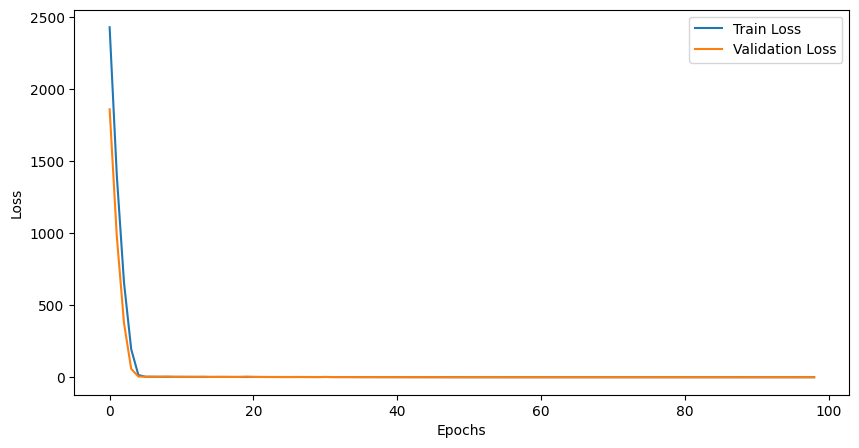

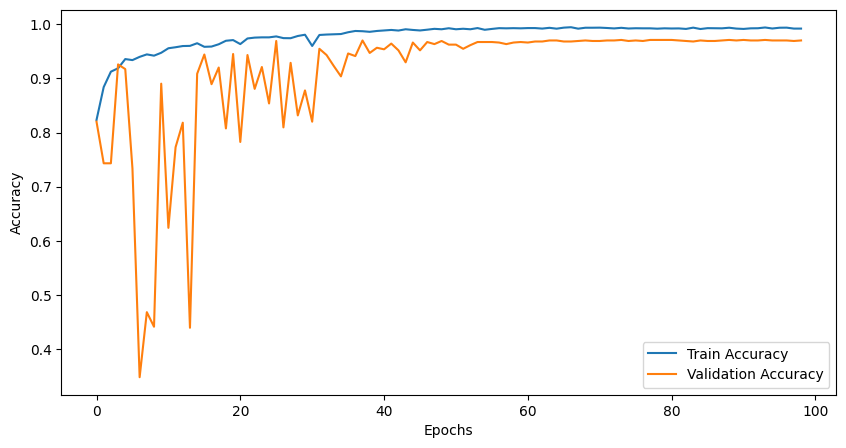

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

train_dir = 'BMEG3103_project/project1_dataset1/train'
val_dir = 'BMEG3103_project/project1_dataset/val'
test_dir = 'BMEG3103_project/project1_dataset/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.4, 1.6],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary',
    shuffle=False
)

vgg16_base = tf.keras.applications.VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

resnet101_base = tf.keras.applications.ResNet101(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

vgg16_base.trainable = True
resnet101_base.trainable = True

for layer in vgg16_base.layers[:15]:
    layer.trainable = False
for layer in resnet101_base.layers[:15]:
    layer.trainable = False

input_layer = tf.keras.Input(shape=(224, 224, 3))

vgg16_output = vgg16_base(input_layer)
resnet101_output = resnet101_base(input_layer)

vgg16_output = tf.keras.layers.GlobalAveragePooling2D()(vgg16_output)
resnet101_output = tf.keras.layers.GlobalAveragePooling2D()(resnet101_output)

from tensorflow.keras.layers import BatchNormalization, Dense
from tensorflow.keras.regularizers import l1, l2, l1_l2

combined = tf.keras.layers.concatenate([vgg16_output, resnet101_output])

x = tf.keras.layers.BatchNormalization()(combined)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(2, activation='softmax')(x)
                                                       
model = tf.keras.Model(inputs=input_layer, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

def cosine_annealing(epoch, lr, total_epochs):
    return 0.5 * lr * (1 + np.cos(np.pi * epoch / total_epochs))

total_epochs = 200

lr_scheduler = LearningRateScheduler(lambda epoch, lr: cosine_annealing(epoch, lr, total_epochs))

history = model.fit(
    train_generator,
    epochs=total_epochs,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_scheduler]
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')

test_generator.reset()
preds = model.predict(test_generator)
preds = np.argmax(preds, axis=1)
true_labels = test_generator.classes

threshold = 0.5 
preds = (model.predict(test_generator)[:, 1] > threshold).astype(int)

test_precision = precision_score(true_labels, preds)
test_recall = recall_score(true_labels, preds)
f1 = f1_score(true_labels, preds)
conf_matrix = confusion_matrix(true_labels, preds)

print(f'F1 Score: {f1:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Found 6356 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 698 images belonging to 2 classes.


/home/user/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
 56/100 ━━━━━━━━━━━━━━━━━━━━ 30s 688ms/step - accuracy: 0.7108 - loss: 2850.9041

2024-11-25 18:30:35.682909: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_add_reduce_subtract_fusion_1', 4 bytes spill stores, 4 bytes spill loads



100/100 ━━━━━━━━━━━━━━━━━━━━ 129s 901ms/step - accuracy: 0.7498 - loss: 2715.7500 - val_accuracy: 0.7481 - val_loss: 1859.1228 - learning_rate: 1.0000e-04
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 740ms/step - accuracy: 0.8706 - loss: 1618.8369 - val_accuracy: 0.8644 - val_loss: 975.0766 - learning_rate: 9.9994e-05
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 748ms/step - accuracy: 0.9025 - loss: 804.3840 - val_accuracy: 0.9490 - val_loss: 374.6723 - learning_rate: 9.9969e-05
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 744ms/step - accuracy: 0.9216 - loss: 276.1942 - val_accuracy: 0.9077 - val_loss: 58.2357 - learning_rate: 9.9914e-05
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 745ms/step - accuracy: 0.9396 - loss: 29.9421 - val_accuracy: 0.4038 - val_loss: 4.0477 - learning_rate: 9.9815e-05
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 759ms/step - accuracy: 0.9436 - loss: 3.3138 - val_accuracy: 0.8865 - val_loss: 3.6793 - learning_rate: 9.9661e-05
Epoch 7/200
100/100 ━━━━━━━━━━━━

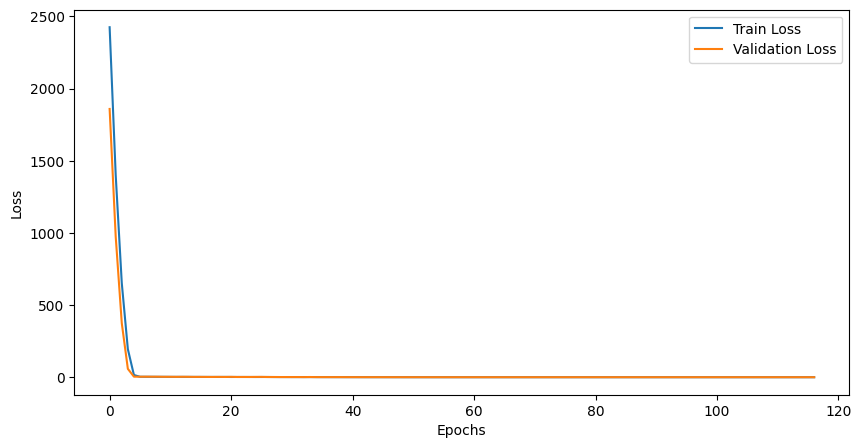

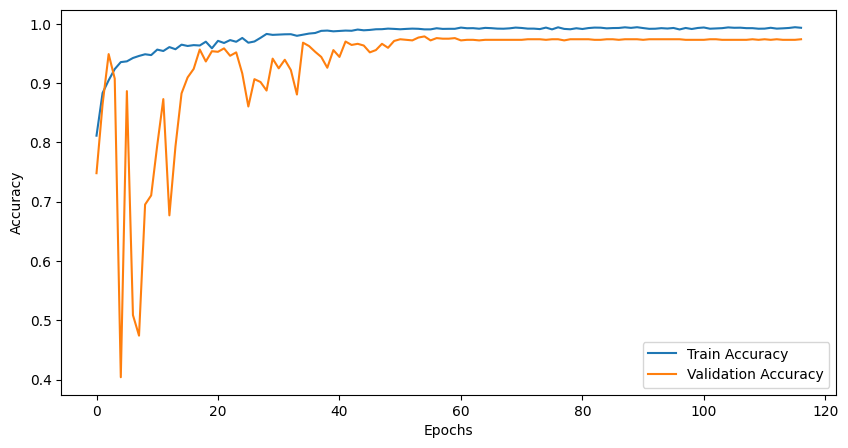

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

train_dir = 'BMEG3103_project/project1_dataset1/train'
val_dir = 'BMEG3103_project/project1_dataset/val'
test_dir = 'BMEG3103_project/project1_dataset/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.4, 1.6],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary',
    shuffle=False
)

vgg16_base = tf.keras.applications.VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

resnet101_base = tf.keras.applications.ResNet101(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

vgg16_base.trainable = True
resnet101_base.trainable = True

for layer in vgg16_base.layers[:15]:
    layer.trainable = False
for layer in resnet101_base.layers[:15]:
    layer.trainable = False

input_layer = tf.keras.Input(shape=(224, 224, 3))

vgg16_output = vgg16_base(input_layer)
resnet101_output = resnet101_base(input_layer)

vgg16_output = tf.keras.layers.GlobalAveragePooling2D()(vgg16_output)
resnet101_output = tf.keras.layers.GlobalAveragePooling2D()(resnet101_output)

from tensorflow.keras.layers import BatchNormalization, Dense
from tensorflow.keras.regularizers import l1, l2, l1_l2

combined = tf.keras.layers.concatenate([vgg16_output, resnet101_output])

x = tf.keras.layers.BatchNormalization()(combined)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(2, activation='softmax')(x)
                                                       
model = tf.keras.Model(inputs=input_layer, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

def cosine_annealing(epoch, lr, total_epochs):
    return 0.5 * lr * (1 + np.cos(np.pi * epoch / total_epochs))

total_epochs = 200

lr_scheduler = LearningRateScheduler(lambda epoch, lr: cosine_annealing(epoch, lr, total_epochs))

history = model.fit(
    train_generator,
    epochs=total_epochs,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_scheduler]
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')

test_generator.reset()
preds = model.predict(test_generator)
preds = np.argmax(preds, axis=1)
true_labels = test_generator.classes

threshold = 0.5 
preds = (model.predict(test_generator)[:, 1] > threshold).astype(int)

test_precision = precision_score(true_labels, preds)
test_recall = recall_score(true_labels, preds)
f1 = f1_score(true_labels, preds)
conf_matrix = confusion_matrix(true_labels, preds)

print(f'F1 Score: {f1:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Found 6356 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 698 images belonging to 2 classes.


/home/user/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
 50/100 ━━━━━━━━━━━━━━━━━━━━ 34s 691ms/step - accuracy: 0.7317 - loss: 2867.4861

2024-11-25 21:09:11.330559: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_add_reduce_subtract_fusion_1', 4 bytes spill stores, 4 bytes spill loads



100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 923ms/step - accuracy: 0.7696 - loss: 2713.6846 - val_accuracy: 0.8798 - val_loss: 1857.5105 - learning_rate: 1.0000e-04
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 757ms/step - accuracy: 0.8781 - loss: 1617.7301 - val_accuracy: 0.7433 - val_loss: 974.8134 - learning_rate: 9.9994e-05
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 753ms/step - accuracy: 0.9075 - loss: 804.8118 - val_accuracy: 0.7433 - val_loss: 374.6275 - learning_rate: 9.9969e-05
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 759ms/step - accuracy: 0.9090 - loss: 275.6463 - val_accuracy: 0.7433 - val_loss: 57.9876 - learning_rate: 9.9914e-05
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 758ms/step - accuracy: 0.9216 - loss: 29.9408 - val_accuracy: 0.7442 - val_loss: 3.4925 - learning_rate: 9.9815e-05
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 749ms/step - accuracy: 0.9350 - loss: 3.2438 - val_accuracy: 0.6183 - val_loss: 3.6026 - learning_rate: 9.9661e-05
Epoch 7/200
100/100 ━━━━━━━━━━━━

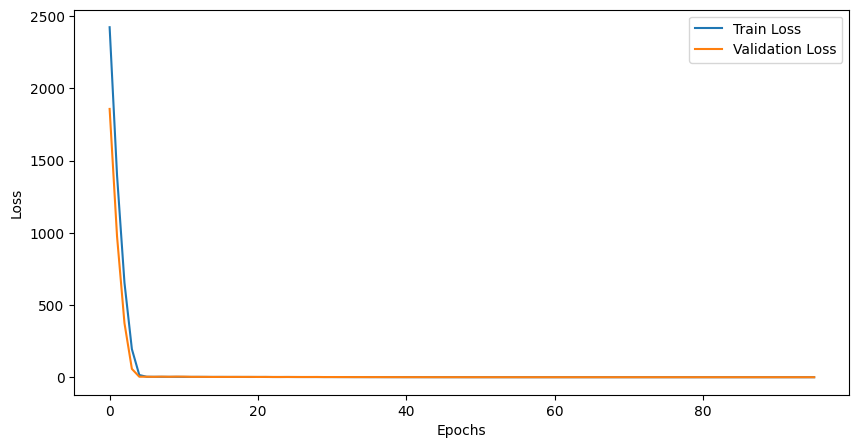

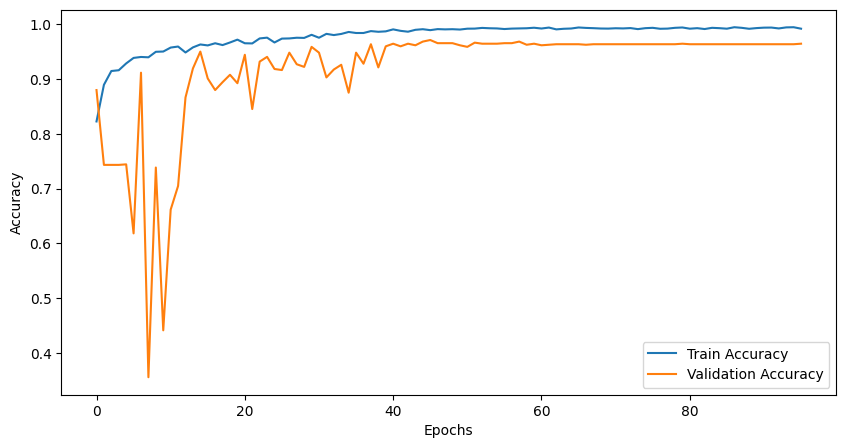

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

train_dir = 'BMEG3103_project/project1_dataset1/train'
val_dir = 'BMEG3103_project/project1_dataset/val'
test_dir = 'BMEG3103_project/project1_dataset/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.4, 1.6],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary',
    shuffle=False
)

vgg16_base = tf.keras.applications.VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

resnet101_base = tf.keras.applications.ResNet101(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

vgg16_base.trainable = True
resnet101_base.trainable = True

for layer in vgg16_base.layers[:15]:
    layer.trainable = False
for layer in resnet101_base.layers[:15]:
    layer.trainable = False

input_layer = tf.keras.Input(shape=(224, 224, 3))

vgg16_output = vgg16_base(input_layer)
resnet101_output = resnet101_base(input_layer)

vgg16_output = tf.keras.layers.GlobalAveragePooling2D()(vgg16_output)
resnet101_output = tf.keras.layers.GlobalAveragePooling2D()(resnet101_output)

from tensorflow.keras.layers import BatchNormalization, Dense
from tensorflow.keras.regularizers import l1, l2, l1_l2

combined = tf.keras.layers.concatenate([vgg16_output, resnet101_output])

x = tf.keras.layers.BatchNormalization()(combined)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(2, activation='softmax')(x)
                                                       
model = tf.keras.Model(inputs=input_layer, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

def cosine_annealing(epoch, lr, total_epochs):
    return 0.5 * lr * (1 + np.cos(np.pi * epoch / total_epochs))

total_epochs = 200

lr_scheduler = LearningRateScheduler(lambda epoch, lr: cosine_annealing(epoch, lr, total_epochs))

history = model.fit(
    train_generator,
    epochs=total_epochs,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_scheduler]
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')

test_generator.reset()
preds = model.predict(test_generator)
preds = np.argmax(preds, axis=1)
true_labels = test_generator.classes

threshold = 0.5 
preds = (model.predict(test_generator)[:, 1] > threshold).astype(int)

test_precision = precision_score(true_labels, preds)
test_recall = recall_score(true_labels, preds)
f1 = f1_score(true_labels, preds)
conf_matrix = confusion_matrix(true_labels, preds)

print(f'F1 Score: {f1:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

print("Classification Report:")
print(classification_report(true_labels, preds))

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

train_dir = 'BMEG3103_project/project1_dataset1/train'
val_dir = 'BMEG3103_project/project1_dataset/val'
test_dir = 'BMEG3103_project/project1_dataset/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.4, 1.6],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary',
    shuffle=False
)

vgg16_base = tf.keras.applications.VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

resnet101_base = tf.keras.applications.ResNet101(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

vgg16_base.trainable = True
resnet101_base.trainable = True

for layer in vgg16_base.layers[:15]:
    layer.trainable = False
for layer in resnet101_base.layers[:15]:
    layer.trainable = False

input_layer = tf.keras.Input(shape=(224, 224, 3))

vgg16_output = vgg16_base(input_layer)
resnet101_output = resnet101_base(input_layer)

vgg16_output = tf.keras.layers.GlobalAveragePooling2D()(vgg16_output)
resnet101_output = tf.keras.layers.GlobalAveragePooling2D()(resnet101_output)

from tensorflow.keras.layers import BatchNormalization, Dense
from tensorflow.keras.regularizers import l1, l2, l1_l2

combined = tf.keras.layers.concatenate([vgg16_output, resnet101_output])

x = tf.keras.layers.BatchNormalization()(combined)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(2, activation='softmax')(x)
                                                       
model = tf.keras.Model(inputs=input_layer, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

def cosine_annealing(epoch, lr, total_epochs):
    return 0.5 * lr * (1 + np.cos(np.pi * epoch / total_epochs))

total_epochs = 200

lr_scheduler = LearningRateScheduler(lambda epoch, lr: cosine_annealing(epoch, lr, total_epochs))


2024-11-26 00:05:33.327987: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732550733.382618   78751 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732550733.399846   78751 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 00:05:33.537351: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 6356 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 698 images belonging to 2 classes.


I0000 00:00:1732550737.350017   78751 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13553 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Ti SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


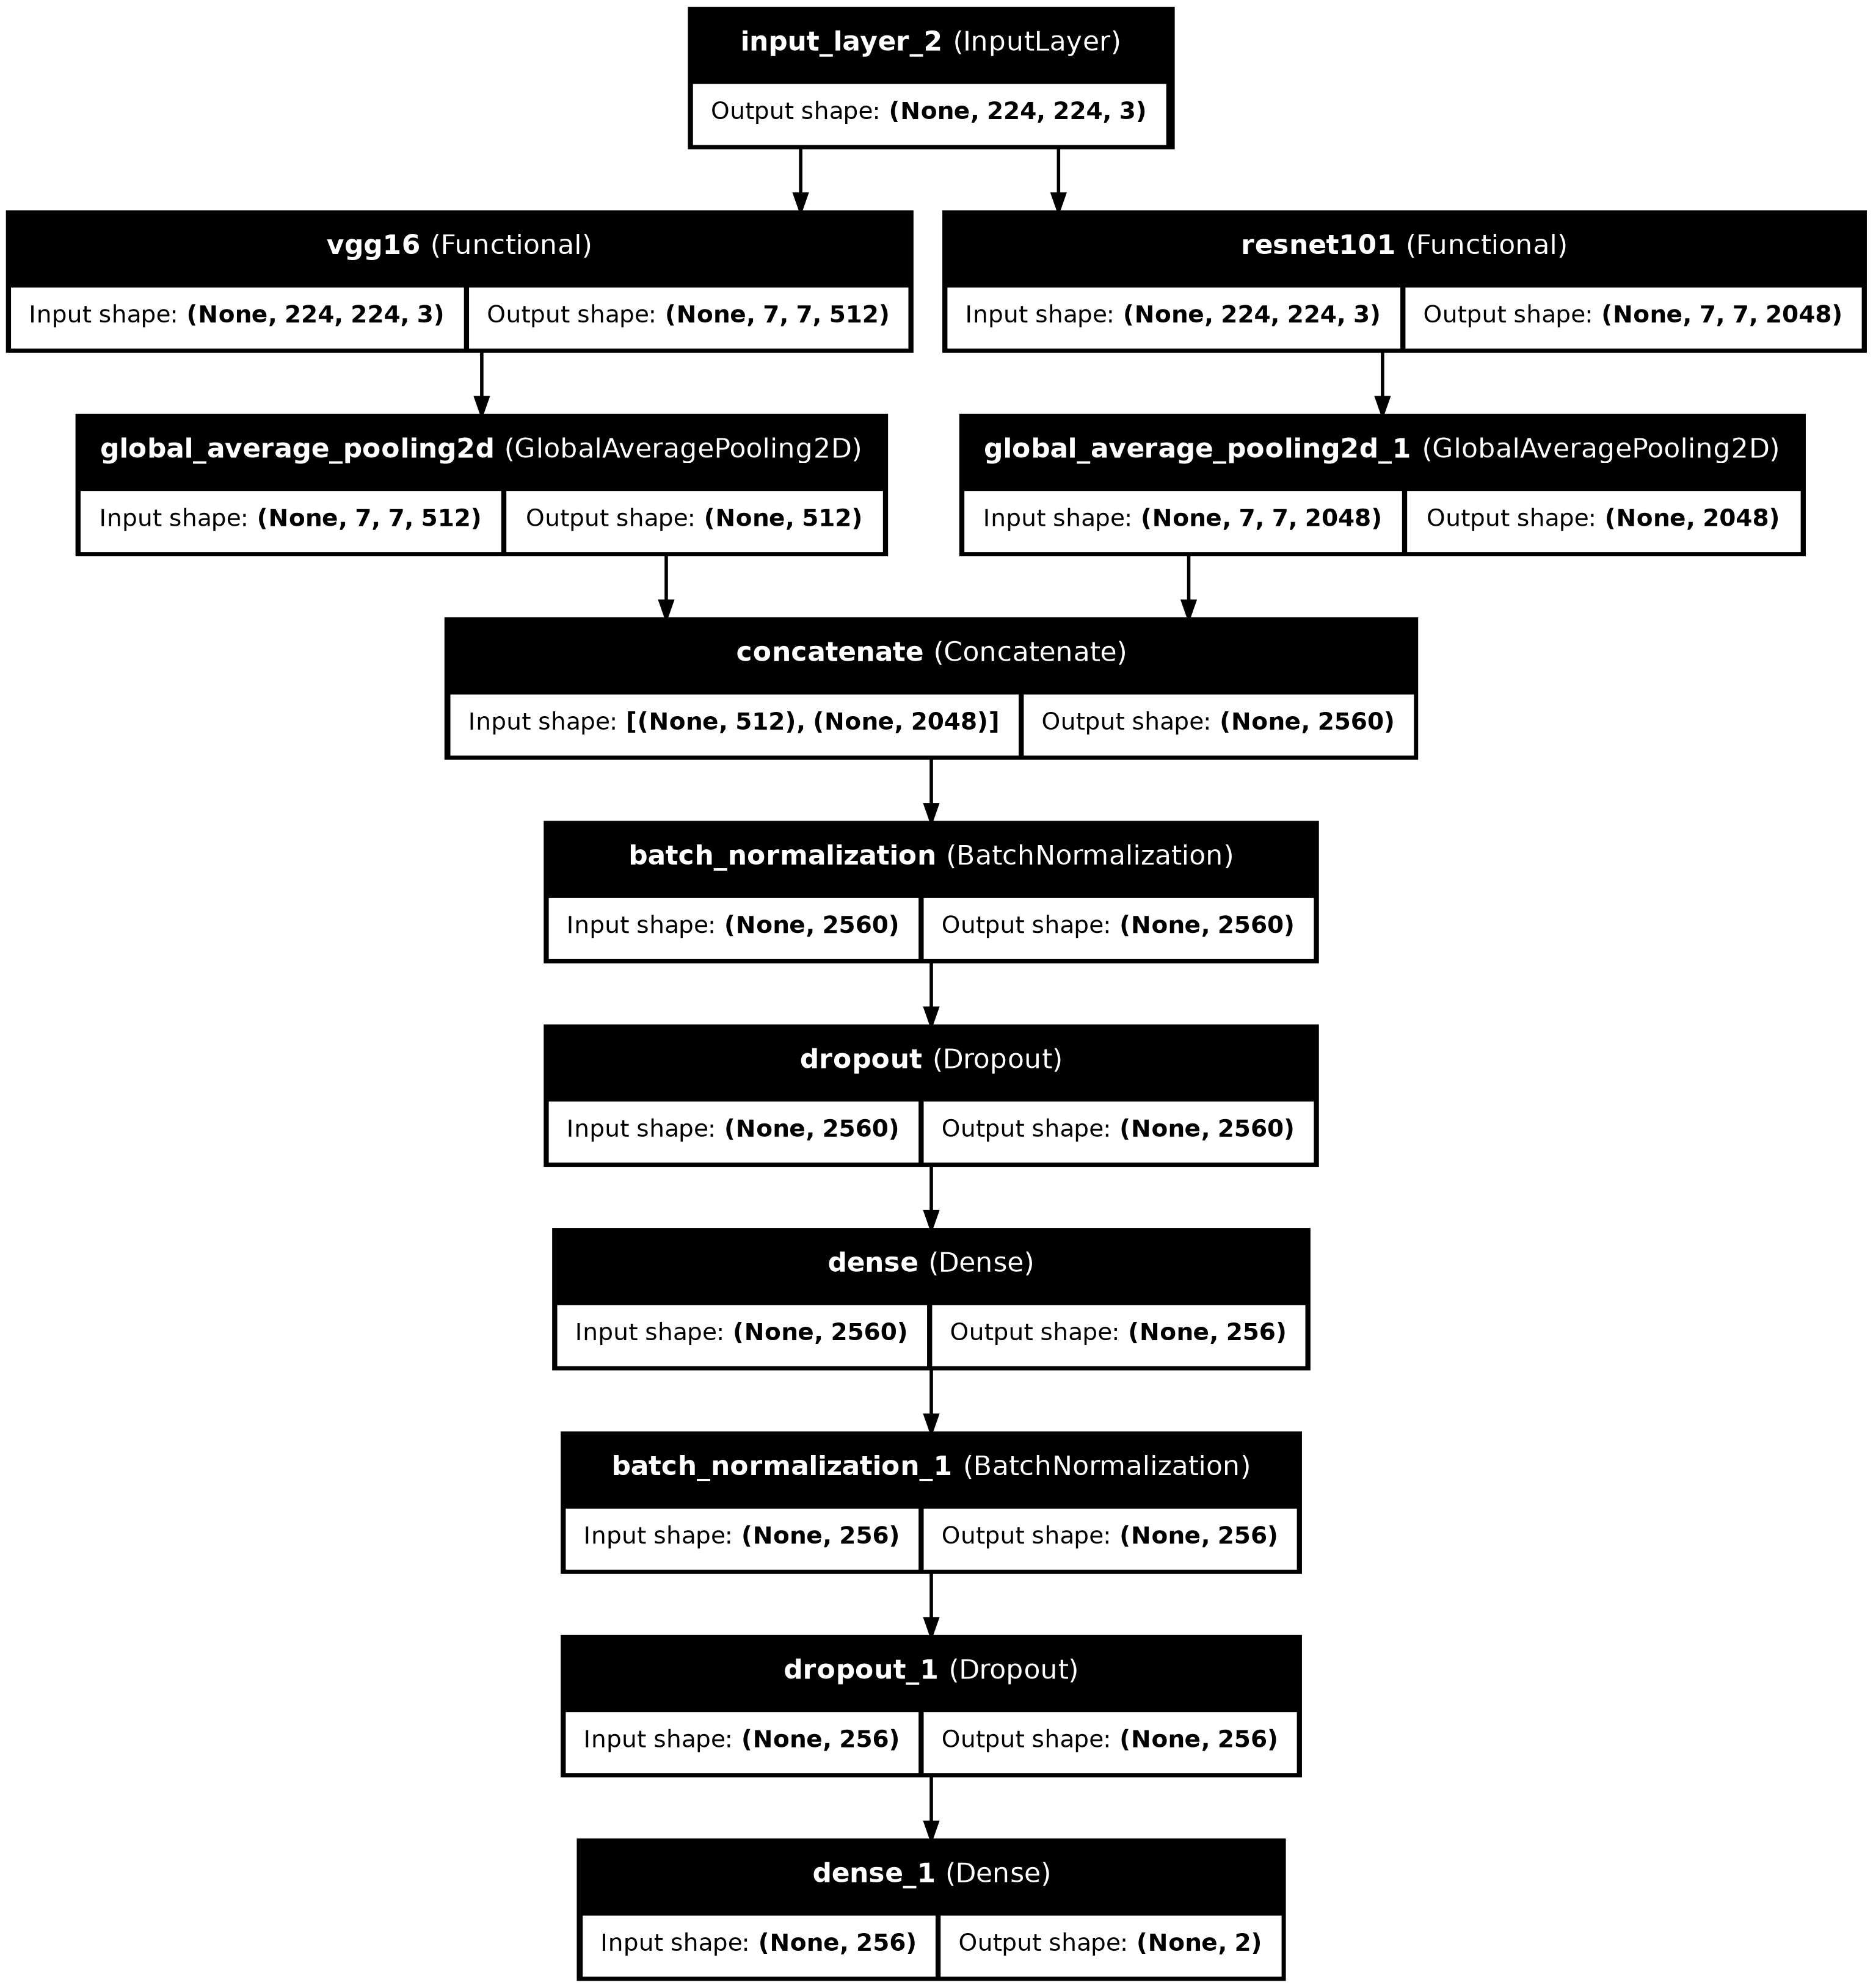

In [2]:
from tensorflow.keras.utils import plot_model 
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)